In [90]:
import sys,os
sys.path.append('../')
from deep_rl import *
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import trange, tqdm
import random
import numpy as np
import pickle

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
with open('../storage/5b-main-generalization-all-baselines.p', 'rb') as f:
    rewards1 = pickle.load(f)

with open('../storage/11-rewards-0.8eps.p', 'rb') as f:
    rewards2 = pickle.load(f)

In [91]:
rewards = {}
iters = [0, 1e2, 1e3, 3e3, 1e4, 2e4, 5e4, 1e5, 2e5, 3e5]
for i in iters:
    with open('../storage/14-'+str(int(i))+'-rewards-1eps.p', 'rb') as f:
        rewards2 = pickle.load(f)
        rewards = {**rewards, **rewards2}

In [94]:
def plot_rewards(rewards, plot_seperate=True , clip=50000, title='unnamed'):
    smooth = 5000
    
    colors = ['red', 'blue', 'green', 'm', 'k', 'y', '#ec7603', '#34495e', '#999999']
    
    plt.figure(figsize=(18,6), dpi=200)
    if(plot_seperate):
        for k, v in rewards.items():
            for t, r in zip(v[0], v[1]):
#                 plt.plot(t, r, label=k)
                plt.plot(convolve(np.interp(np.arange(clip), t, r), smooth),label=k)
        plt.legend(), plt.show()
        return
    
    for j, (k, v) in enumerate(rewards.items()):
        r_vec = np.zeros((len(v[0]), clip-smooth+1))
        for i, (t, r) in enumerate(zip(v[0], v[1])):
            r_vec[i,:] = convolve(np.interp(np.arange(clip), t, r), smooth)
    
        mean = np.mean(np.array(r_vec), axis=0)
        std = np.std(np.array(r_vec), axis=0)
        plt.plot(mean, label=k, color=colors[j])
        plt.fill_between(np.arange(0, len(mean)), mean+std, mean-std, alpha=0.3)
    
    plt.xlabel('timesteps'), plt.ylabel('episodic returns')
    plt.title(title)
    plt.legend(loc='lower right'), plt.show()

IndexError: list index out of range

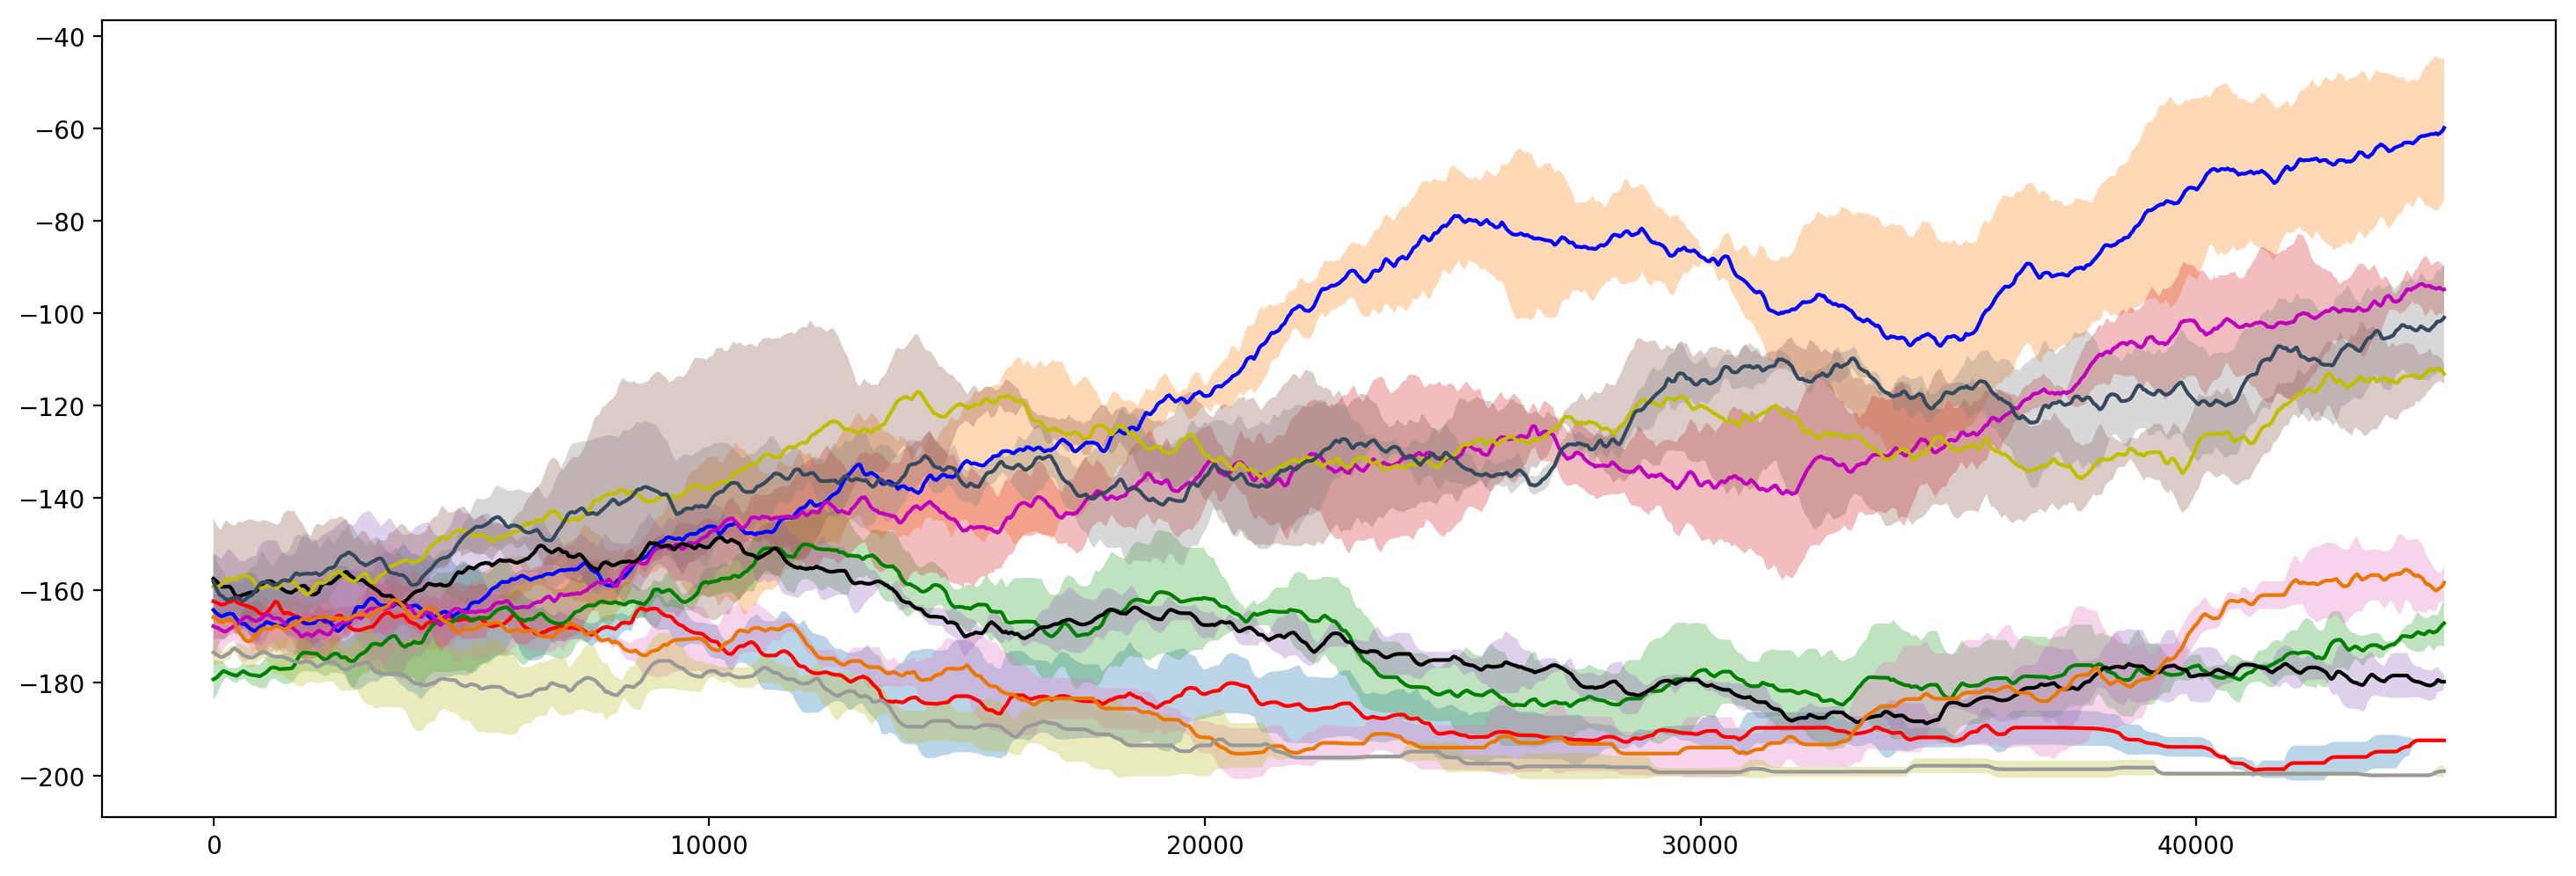

In [95]:
plot_rewards(rewards, plot_seperate=False, title='3 runs on 4 rooms env')
# plot_rewards(rewards2, plot_seperate=True, title='3 runs on 4 rooms env')

In [122]:
count = 0
r_vec_169 = []
r_vec_2708 = []
for key, vals in rewards.items():
#     import pdb; pdb.set_trace()
    if('169' in key):
        avr = np.mean([np.mean(vals[1][0]), np.mean(vals[1][1]), np.mean(vals[1][2])])
        r_vec_169.append(avr)
    if('2708' in key):
        avr = np.mean([np.mean(vals[1][0]), np.mean(vals[1][1]), np.mean(vals[1][2])])
        r_vec_2708.append(avr)
        

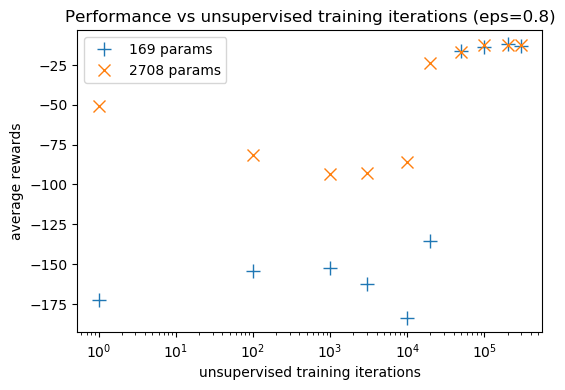

(<matplotlib.legend.Legend at 0x7fd04e4dbcf8>, None)

In [140]:
iters2 = [i+1 for i in iters]
plt.figure(figsize=(6,4),dpi=100)
plt.semilogx(iters2, r_vec_169, '+', label='169 params',markersize=10)
plt.semilogx(iters2, r_vec_2708, 'x', label='2708 params', markersize=8)
plt.ylabel('average rewards'), plt.xlabel('unsupervised training iterations')
plt.title('Performance vs unsupervised training iterations (eps=0.8)')
plt.legend(), plt.show()

In [111]:
np.array(rewards['avDSR, 1eps, d0.01: 169 learnable params (0 training)'][1][:])

array([array([ -88,  -12,  -10,  -58, -120,  -19, -200, -200, -127, -200, -200,
         -8, -200,  -28,  -75, -200, -187, -123, -143, -200, -200, -200,
       -200, -200, -200, -200, -200,  -67, -164, -200, -104,  -82, -200,
       -122,  -63, -200, -123,   -7, -200,  -13,  -91,  -18, -200, -200,
       -200, -162, -200,    0, -200,    0,  -65, -200,  -62,  -25, -200,
       -111,  -98, -200, -200, -200, -200,  -21,    0, -200, -200,  -42,
       -115, -200, -200, -108, -200, -134, -200, -125, -200,  -66, -200,
       -200, -200, -200, -200, -200, -125, -117, -200,  -66,   -2, -200,
       -180,  -88, -200, -200, -200, -168,  -53, -200,  -29, -200, -200,
       -200, -200, -200, -128, -200, -200, -200, -114, -128,  -50, -200,
        -29, -200, -200, -200,  -62, -200, -200,  -67, -200, -200, -200,
       -200, -200, -200,  -61, -165, -200, -200, -200,  -68, -200, -200,
       -200, -200, -200, -200, -200, -200, -138, -200,   -2,  -80, -200,
       -200, -200, -200, -200, -200, -200, -